### Pulling genes by significant SNPs from multivariate GWAS on Starch and Protein

In [1]:
.libPaths(c('/home/ssapkot/.conda/envs/r_env_360/lib', .libPaths()))

library(tidyverse)
library(ggplot2)
library(pheatmap)
setwd('/panicle/ssapkot/StarchProtein/')

Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.0     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.2
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


### Gene expression data

#### Chromosome 8 significant genes and their first interactors
Using medium confidenc(0.9 or 900) interactors
##### Davidson et. al Gene Expression result

## Associated Genes

GeneID,GeneName,seed,spikelet,stem
SORBI_3001G000200,SORBI_3001G000200,22,36,59
SORBI_3001G000400,SORBI_3001G000400,3,13,6
SORBI_3001G000700,SORBI_3001G000700,1,3,5
SORBI_3001G000800,SORBI_3001G000800,50,69,91
SORBI_3001G000900,SORBI_3001G000900,NA,6,NA
SORBI_3001G001000,SORBI_3001G001000,NA,2,1


GeneID
SORBI_3001G054500
SORBI_3008G111500
SORBI_3008G111600
SORBI_3008G158332
SORBI_3008G158400


Warning message:
“Column `GeneID` joining factors with different levels, coercing to character vector”

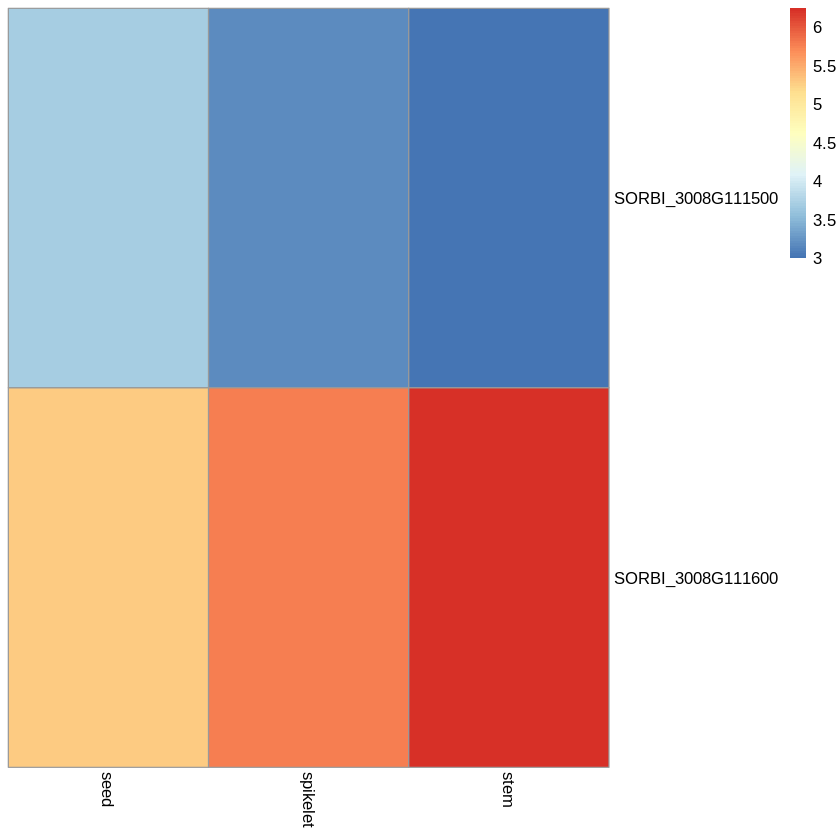

In [19]:
df1 <- read.table('results/expression/GeneExp_TPM_RIKEN.tsv', sep='\t', header=T)
df2 <- read.table('results/annotation/sigGenes_SORBI.txt',header=T)
head(df1)
head(df2)

exp <- df2 %>% left_join(df1,by='GeneID')
exp <- exp[complete.cases(exp),]
log <- log2(exp[-c(1,2)])
log[is.na(log)] <- 0
rownames(log) <- exp$GeneID
pheatmap(log, cluster_rows=F, cluster_cols=F)

## Genes and Interactors

In [ ]:
df1 <- read.table('results/expression/GeneExp_TPM_Davidson.tsv', sep='\t', header=T)
df2 <- read.table('results/annotation/GenesAndNeighbors_900_SORBI.txt',header=T)
head(df1)
head(df2)

exp <- df2 %>% left_join(df1,by='GeneID')
exp <- exp[complete.cases(exp),]
exp
# log <- log2(exp[-c(1,2)])
# log[is.na(log)] <- 0
# rownames(log) <- exp$GeneID
# pheatmap(log, cluster_rows=T, cluster_cols=T)

Warning message:
“Column `GeneID` joining factors with different levels, coercing to character vector”

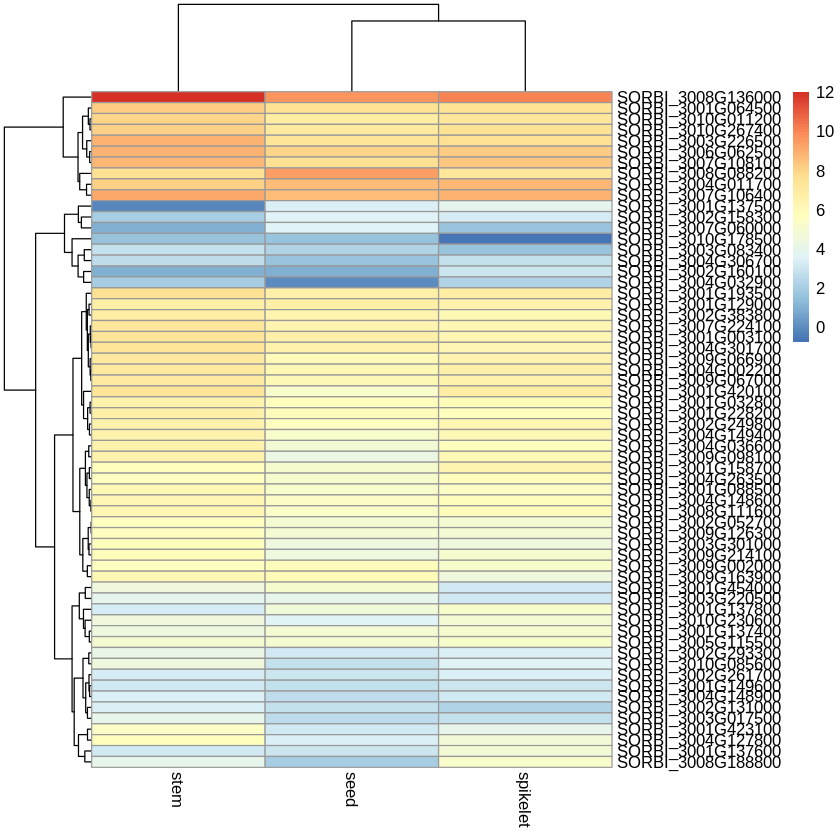

In [70]:
df1 <- read.table('results/expression/GeneExp_TPM_RIKEN.tsv', sep='\t', header=T)
df2 <- read.table('results/annotation/Genes_interactors/Genes_Interactors_Chr8_conf0.7_SORBI.txt',header=T)

exp <- df2 %>% left_join(df1,by='GeneID')
exp <- exp[complete.cases(exp),]
log <- log2(exp[-c(1,2)])
log[is.na(log)] <- 0
rownames(log) <- exp$GeneID
pheatmap(log, cluster_rows=T, cluster_cols=T)

### Combining chr 4, 8 and 10 genes and interactors

In [10]:

exp <- read.table('results/expression/GeneExp_TPM_Olson.csv', sep=',', header=T)
exp1 <- df4 %>% left_join(exp, by="GeneID")
exp1 <- exp1[complete.cases(exp1),]
#exp1[is.na(exp1)] <- 1
exp1
log <- log2(exp1[,-c(1,2,3)])
rownames(log) <- exp1$GeneID
annotation <- data.frame(exp1[,2])
rownames(annotation) <- rownames(log)
colnames(annotation) <- c('group')
dim(annotation)
log$group <- exp1$group
write.csv(log, 'results/expression/Olson_GeneExp_GenesInteractors.csv',row.names=TRUE)
dim(log)
#png('results/expression/Heatmap_GeneExp_Chr4_8_GenesInteractors.png', height=900,width=900)
#pheatmap(log, cluster_rows=T, cluster_cols=T, angle_col=45)
#dev.off()

GeneID,group
SORBI_3002G175400,Chr4
SORBI_3003G187800,Chr4
SORBI_3003G270400,Chr4
SORBI_3003G300200,Chr4
SORBI_3004G196101,Chr4
SORBI_3004G260600,Chr4


[1] 138   2

Warning message:
“Column `GeneID` joining factors with different levels, coercing to character vector”

,GeneID,group,Gene.Name,floral.meristem,flower,plant.embryo,root,shoot,vegetative.meristem
1,SORBI_3002G175400,Chr4,SORBI_3002G175400,60.0,58.0,38.0,28.0,75.0,60.0
6,SORBI_3004G260600,Chr4,DES2,0.2,0.5,0.9,3.0,1.0,0.1
7,SORBI_3004G260800,Chr4,SORBI_3004G260800,195.0,579.0,711.0,316.0,727.0,187.0
9,SORBI_3004G312500,Chr4,SORBI_3004G312500,7.0,0.1,7.0,258.0,5.0,5.0
10,SORBI_3006G111700,Chr4,SORBI_3006G111700,56.0,39.0,51.0,23.0,22.0,69.0
11,SORBI_3007G153900,Chr4,SORBI_3007G153900,0.9,6.0,1.0,260.0,212.0,0.8
12,SORBI_3010G181500,Chr4,SORBI_3010G181500,52.0,18.0,36.0,34.0,29.0,53.0
13,SORBI_3001G003100,Chr8,SORBI_3001G003100,129.0,77.0,334.0,180.0,182.0,174.0
14,SORBI_3001G032800,Chr8,SORBI_3001G032800,114.0,77.0,104.0,72.0,48.0,103.0
16,SORBI_3001G064500,Chr8,SORBI_3001G064500,327.0,184.0,183.0,210.0,93.0,288.0


[1] 110   1

[1] 110   7

In [13]:
### merging all genes and interactors from different chromosomes into one
c4 <- read.table('results/annotation/Genes_interactors/pub/Chr4_genes_interactors_700_range.txt', header=F)
c8 <- read.table('results/annotation/Genes_interactors/Chr8_genes_interactors_700_range.txt', header=F)
c10 <- read.table('results/annotation/Genes_interactors/pub/Chr10_genes_interactors_700_range.txt', header=F)

df.gi <- rbind(c4,c8,c10)
dim(df.gi)
df.g <- unique(df.gi)
dim(df.g)

write.csv(df.g,'results/annotation/Genes_interactors/pub/AllChr_genes_interactors_range_original.txt',row.names=F)

[1] 129   1

[1] 129   1

In [19]:
## Making a df with all there sb, sobic, sorbi format for all genes.
df1 <- read.table('results/annotation/genes//Chr8_Genes_Interactors_Sobic2Sb.txt',header=F)
df2 <- read.table('results/annotation/genes/Chr8_Genes_Interactors_Sobic.txt',header=F)
df <- cbind(df1,df2,df2)
colnames(df) <- c('SbID','SobicID','GeneID')
dim(df)
df
write.csv(df, 'results/annotation/Chr8_Genes_interactors_allFormats.csv',row.names=F)

[1] 134   3

SbID,SobicID,GeneID
Sb01g000380,Sobic.001G003100,Sobic.001G003100
Sb01g003070,Sobic.001G032800,Sobic.001G032800
Sb01g003220,Sobic.001G034400,Sobic.001G034400
Sb01g005860,Sobic.001G064500,Sobic.001G064500
Sb01g007980,Sobic.001G088500,Sobic.001G088500
Sb01g010460,Sobic.001G118600,Sobic.001G118600
Sb01g010650,Sobic.001G120500,Sobic.001G120500
Sb01g011310,Sobic.001G129000,Sobic.001G129000
Sb01g012000,Sobic.001G137400,Sobic.001G137400
Sb01g012010,Sobic.001G137500,Sobic.001G137500
